# OrdinalEncoder
The OrdinalEncoder() will replace the variable labels by digits, from 1 to the number of different labels. 

If we select "arbitrary", then the encoder will assign numbers as the labels appear in the variable (first come first served).

If we select "ordered", the encoder will assign numbers following the mean of the target value for that label. So labels for which the mean of the target is higher will get the number 1, and those where the mean of the target is smallest will get the number n.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.encoding import OrdinalEncoder

In [2]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['age'] = data['age'].astype('float')
    data['fare'] = data['fare'].astype('float')
    data['embarked'].fillna('C', inplace=True)
    data.drop(labels=['boat', 'body', 'home.dest'], axis=1, inplace=True)
    return data

In [3]:
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S


In [5]:
X = data.drop(['survived', 'name', 'ticket'], axis=1)
y = data.survived

In [6]:
# we will encode the below variables, they have no missing values
X[['cabin', 'pclass', 'embarked']].isnull().sum()

cabin       0
pclass      0
embarked    0
dtype: int64

In [7]:
''' Make sure that the variables are type (object).
if not, cast it as object , otherwise the transformer will either send an error (if we pass it as argument) 
or not pick it up (if we leave variables=None). '''

X[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [8]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((916, 8), (393, 8))

The OrdinalEncoder() replaces categories by ordinal numbers 
(0, 1, 2, 3, etc). The numbers can be ordered based on the mean of the target
per category, or assigned arbitrarily.

Ordered ordinal encoding:  for the variable colour, if the mean of the target
for blue, red and grey is 0.5, 0.8 and 0.1 respectively, blue is replaced by 1,
red by 2 and grey by 0.

Arbitrary ordinal encoding: the numbers will be assigned arbitrarily to the
categories, on a first seen first served basis.

The encoder will encode only categorical variables (type 'object'). A list
of variables can be passed as an argument. If no variables are passed, the
encoder will find and encode all categorical variables (type 'object').


### Ordered

In [9]:
# we will encode 3 variables:
'''
Parameters
----------

encoding_method : str, default='ordered' 
    Desired method of encoding.

    'ordered': the categories are numbered in ascending order according to
    the target mean value per category.

    'arbitrary' : categories are numbered arbitrarily.
    
variables : list, default=None
    The list of categorical variables that will be encoded. If None, the 
    encoder will find and select all object type variables.
'''
ordinal_enc = OrdinalEncoder(encoding_method='ordered',
                             variables=['pclass', 'cabin', 'embarked'])

# for this encoder, we need to pass the target as argument
# if encoding_method='ordered'
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['pclass', 'cabin', 'embarked'])

In [10]:
ordinal_enc.encoder_dict_

{'pclass': {3: 0, 2: 1, 1: 2},
 'cabin': {'T': 0,
  'n': 1,
  'G': 2,
  'A': 3,
  'C': 4,
  'F': 5,
  'D': 6,
  'E': 7,
  'B': 8},
 'embarked': {'S': 0, 'Q': 1, 'C': 2}}

In [11]:
# transform and visualise the data

train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
271,2,male,24.0,1,0,82.2667,8,0
61,2,female,76.0,1,0,78.8500,4,0
1280,0,male,22.0,0,0,7.8958,1,0
247,2,female,54.0,1,0,59.4000,1,2
361,1,female,22.0,1,1,29.0000,1,0


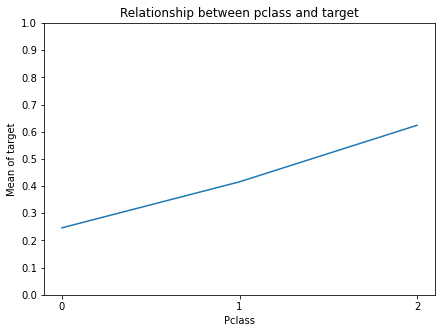

In [27]:
''' The OrdinalEncoder with encoding_method='order' has the characteristic that return monotonic
 variables,that is, encoded variables which values increase as the target increases'''

# let's explore the monotonic relationship
plt.figure(figsize=(7,5))
pd.concat([test_t,y_test], axis=1).groupby("pclass")["survived"].mean().plot()
plt.xticks([0,1,2])
plt.yticks(np.arange(0,1.1,0.1))
plt.title("Relationship between pclass and target")
plt.xlabel("Pclass")
plt.ylabel("Mean of target")
plt.show()

### Arbitrary

In [11]:
ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',
                             variables=['pclass', 'cabin', 'embarked'])

# for this encoder we don't need to add the target. You can leave it or remove it.
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['pclass', 'cabin', 'embarked'])

In [12]:
ordinal_enc.encoder_dict_

{'pclass': {2: 0, 3: 1, 1: 2},
 'cabin': {'n': 0,
  'E': 1,
  'C': 2,
  'D': 3,
  'B': 4,
  'A': 5,
  'F': 6,
  'T': 7,
  'G': 8},
 'embarked': {'S': 0, 'C': 1, 'Q': 2}}

Note that the ordering of the different labels is  not the same when we select "arbitrary" or "ordered"

In [13]:
# transform: see the numerical values in the former categorical variables

train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1122,1,female,NaN,1,1,22.3583,6,1
934,1,female,4.0,0,2,22.0250,0,0
815,1,male,NaN,0,0,14.5000,0,0
124,2,female,48.0,1,1,79.2000,4,1
1125,1,male,24.0,0,0,8.0500,0,0


### Automatically select categorical variables

This encoder selects all the categorical variables, if None is passed to the variable argument when calling the encoder.

In [14]:
ordinal_enc = OrdinalEncoder(encoding_method = 'arbitrary')

# for this encoder we don't need to add the target. You can leave it or remove it.
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['pclass', 'sex', 'cabin', 'embarked'])

In [15]:
ordinal_enc.variables

['pclass', 'sex', 'cabin', 'embarked']

In [16]:
train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1135,1,1,NaN,0,0,7.8958,0,0
328,0,1,34.0,1,0,26.0000,0,0
785,1,0,22.0,1,0,13.9000,0,0
708,1,1,24.0,0,0,7.8542,0,0
486,0,1,24.0,0,0,10.5000,0,0
